In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import datetime as dt
from time import time

In [2]:
"""Cleaning the database"""
data = pd.read_csv("lighter_OBA_anonymized.csv",sep = ";")
# Getting rid of unusable columns i.e. VAR_1 VAR_2? VAR_4 VAR_10?
data = data.drop(labels=['VAR_2', 'VAR_4', 'VAR_10'], axis=1)

# Getting rid of NaN values
data = data.dropna().reset_index().drop(labels=['index'], axis=1)
date_timestamp = data['VAR_1']
# Adding the columns year,month, day and hour,minute,second
format_data = "%Y/%m/%d %H:%M:%S"
date_time = pd.DataFrame(np.array([[dt.datetime.strptime(time_data, format_data).year,\
                                    dt.datetime.strptime(time_data, format_data).month,\
                                    dt.datetime.strptime(time_data, format_data).day,\
                                   (dt.datetime.strptime(time_data, format_data) -\
                                     dt.datetime.strptime(date_timestamp.iloc[0], format_data)).total_seconds()]\
                                   for time_data in date_timestamp]),\
                         columns=['Y', 'M', 'D', 'secs elapsed'])
data = pd.concat([date_time, data], axis=1).drop(labels=['VAR_1'], axis=1)
data.head()

,Y,M,D,secs elapsed,VAR_0,OUTPUT,VAR_3,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_11,VAR_12
0,2013.0,1.0,1.0,0.0,6.4783,197.2403,13.2013,1.7968,99.8511,96.9636,67.8710,6.0957,26.4511,1148.7475
1,2013.0,1.0,1.0,20100.0,5.1601,196.8910,17.0172,1.3381,99.1906,93.5361,66.1649,7.1119,27.6284,1088.4819
2,2013.0,1.0,1.0,32220.0,4.7995,195.9595,17.0450,1.3065,98.9704,93.7300,69.7494,6.4797,29.0867,1088.4507
3,2013.0,1.0,1.0,33600.0,4.9748,196.4253,16.7685,1.3059,98.9704,93.7428,69.6906,6.0586,29.0509,1088.4598
4,2013.0,1.0,1.0,37680.0,4.2844,196.5417,17.8388,1.2739,99.7562,96.9926,69.7073,5.7266,30.7197,1020.3109


In [3]:
"""Rearranged data frame converted into csv file"""
data.to_csv(r'./export_rearranged_dataframe.csv',sep=';', index=False)

In [4]:
"""Basic stats"""
data.describe()

,Y,M,D,secs elapsed,VAR_0,OUTPUT,VAR_3,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_11,VAR_12
count,63651.000000,63651.000000,63651.000000,6.365100e+04,63651.000000,63651.000000,63651.000000,63651.000000,63651.000000,63651.000000,63651.000000,63651.000000,63651.000000,63651.00000
mean,2016.494886,6.347049,15.538907,1.255214e+08,5.032389,185.615819,20.959173,1.544674,99.241169,74.868920,62.659658,4.486648,26.166101,1164.62209
std,2.180428,3.476112,8.809738,6.847466e+07,2.668675,10.715615,7.468945,0.908315,5.410103,18.252058,18.768555,0.891427,2.595023,74.06716
min,2013.000000,1.000000,1.000000,0.000000e+00,0.000000,149.735000,0.000000,0.001200,0.000000,14.345300,0.000000,2.987300,9.929600,682.08490
25%,2015.000000,3.000000,8.000000,6.550974e+07,3.854900,186.179000,15.277850,1.061900,99.300600,62.238050,47.251000,3.908000,24.090700,1148.52640
50%,2017.000000,6.000000,15.000000,1.275488e+08,4.812200,187.459800,19.325500,1.305800,99.610900,72.508700,64.693100,4.109000,26.433000,1191.03600
75%,2018.000000,9.000000,23.000000,1.822357e+08,6.260800,195.144500,25.331800,1.757300,99.851100,85.287700,78.234950,4.622700,28.070250,1208.20050
max,2021.000000,12.000000,31.000000,2.641965e+08,14.131300,203.294900,52.819400,9.697200,101.942800,182.973700,117.415100,8.508100,235.212700,1243.33670


In [5]:
"""Random forest regressor"""
model = RandomForestRegressor(100) # 100 decision trees
y = data['OUTPUT'] # Labels
X = data.drop(labels=['OUTPUT'], axis=1) # Features
model.fit(X, y)

RandomForestRegressor()

In [6]:
f = model.feature_importances_ # Global variable

In [7]:
"""Data visualization"""

"""Standardization"""
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit(data).transform(data) #StandardScaler
standardized_data = pd.DataFrame(standardized_data, columns=data.columns)
standardized_X = standardized_data.drop(labels=['OUTPUT'], axis=1)
standardized_y = standardized_data['OUTPUT']

"""Separation between contexts and settings"""
standardized_X_context = standardized_X.drop(labels=['VAR_0', 'VAR_7', 'VAR_8'], axis=1)
standardized_X_settings = standardized_X[['VAR_0', 'VAR_7', 'VAR_8']]
f_settings = np.array([f[4], f[8], f[9]])
f_settings /= np.sum(f_settings)
f_context = np.array([f[0], f[1], f[2], f[3], f[5], f[6], f[7], f[10], f[11], f[12]])
f_context /= np.sum(f_context)

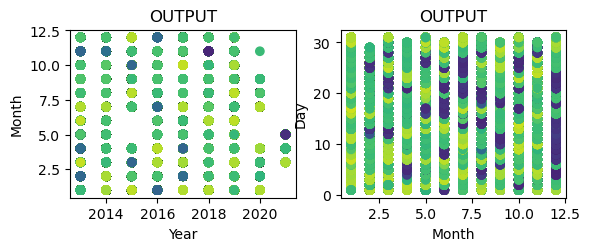

In [8]:
plt.subplot(221)
plt.scatter(data['Y'], data['M'], c=standardized_y)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title("OUTPUT")
plt.subplot(222)
plt.scatter(data['M'], data['D'], c=standardized_y)
plt.xlabel('Month')
plt.ylabel('Day')
plt.title("OUTPUT")
plt.show()

In [9]:
"""We will use this data for the next steps"""
standardized_data = standardized_data.drop(labels=['Y', 'M', 'D'], axis=1)
standardized_X_context_timestamp = standardized_X_context.drop(labels=['Y', 'M', 'D'], axis=1) # Taking into account the timestamp
standardized_X_context = standardized_X_context_timestamp.drop(labels=['secs elapsed'], axis=1) # Without taking into account the timestamp
standardized_X_context_light = standardized_X_context_timestamp.drop(labels=['VAR_6', 'VAR_11'], axis=1) # Pull out the variables with less importance


f_context_timestamp = np.array([f[3], f[5], f[6], f[7], f[10], f[11], f[12]])
f_context_timestamp /= np.sum(f_context_timestamp)

f_context = np.array([f[5], f[6], f[7], f[10], f[11], f[12]])
f_context /= np.sum(f_context)

f_context_light = np.array([f[3], f[5], f[6], f[10], f[12]])
f_context_light /=np.sum(f_context_light)

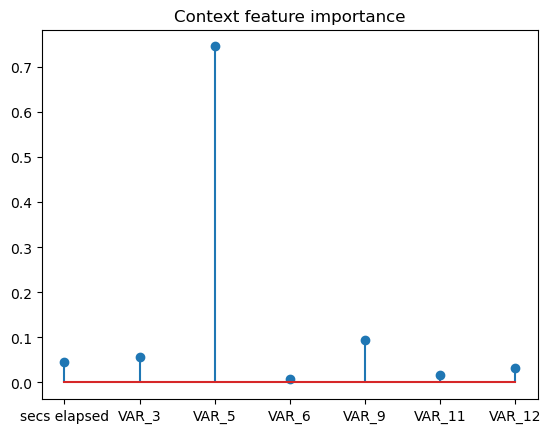

In [10]:
#Display
plt.stem(standardized_X_context_timestamp.columns, f_context_timestamp) 
plt.title("Context feature importance")
plt.show()

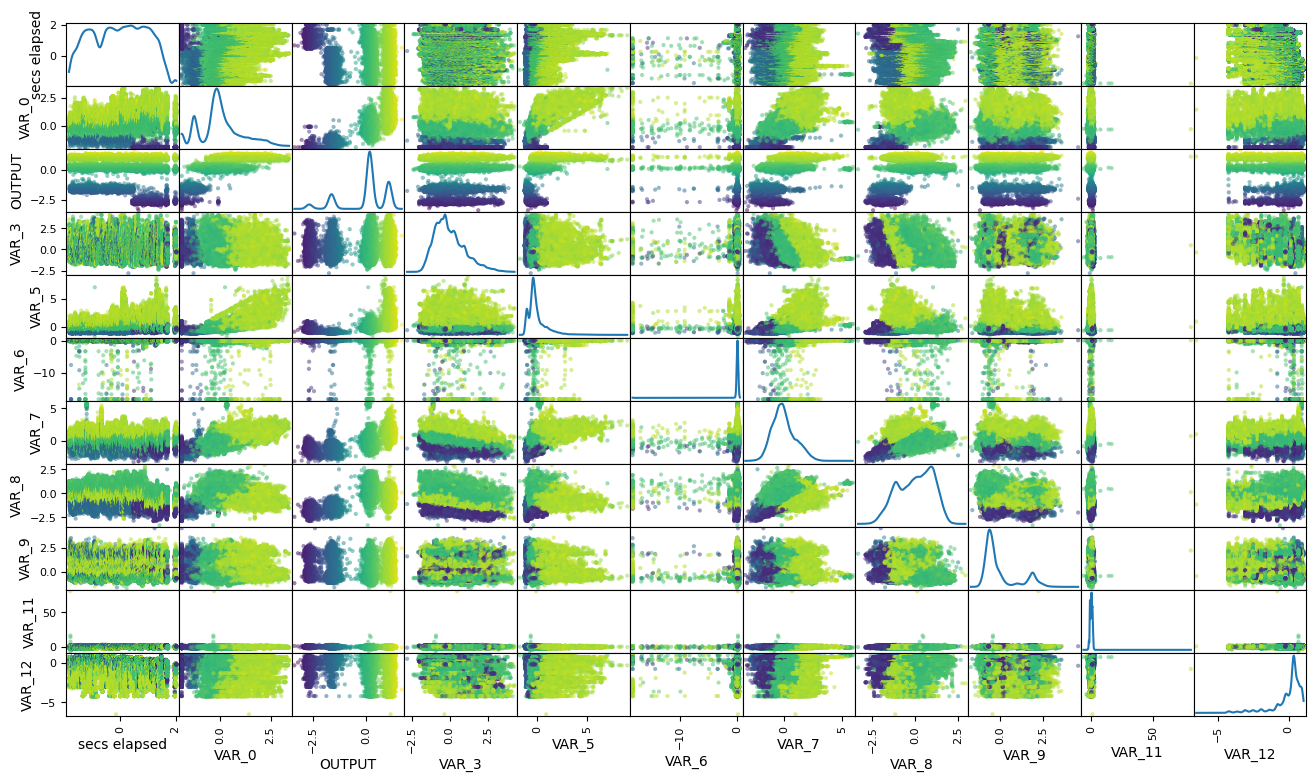

In [11]:
fig = pd.plotting.scatter_matrix(standardized_data, diagonal='kde', figsize=(16, 9), c=standardized_y)

In [12]:
"""NearestNeighbors on the context variables"""
nbVoisins = 10 # Global variable
"""split of the dataset"""
# With no timestamp
xtrain, xtest , ytrain, ytest = train_test_split(standardized_X_context, standardized_y, test_size=0.6, random_state=42)
# Timestamp taken into account
xtstrain, xtstest , ytstrain, ytstest = train_test_split(standardized_X_context_timestamp, standardized_y, test_size=0.6, random_state=42)
# Lighter version
xlighttrain, xlighttest, ylighttrain, ylighttest = train_test_split(standardized_X_context_light, standardized_y, test_size=0.6, random_state=42)

In [13]:
"""Mean method"""
# Just the mean of the settings of the neighbors
def mean_settings(X_settings, indices):
    n = len(indices)
    m = X_settings.shape[1]
    mean_settings = np.zeros((n, m))
    for i in range(n):
        mean_settings[i, :] = np.mean(X_settings.iloc[indices[i]], 0)
    return mean_settings

In [14]:
"""Mean method ponderated by the distances to the point of interest"""
# Weighted average method
def w_mean_settings(X_settings,indices,distances):
    n = len(indices)
    m = X_settings.shape[1]
    mean_settings = np.zeros((n, m))
    for i in range(n):
        # 0.99 to keep the furthest point of the cluster
        weight = [1-(k*0.99)/np.max(distances[i]) for k in distances[i]]
        mean_settings[i, :] = np.average(X_settings.iloc[indices[i]],0,weight)
    return mean_settings

In [51]:
"""fit of the data"""
voisins = NearestNeighbors(n_neighbors=nbVoisins).fit(xtrain)
voisins_ts = NearestNeighbors(n_neighbors=nbVoisins).fit(xtstrain)
voisins_light = NearestNeighbors(n_neighbors=nbVoisins).fit(xlighttrain)

In [16]:
"""Naive predictive model(without taking the importance of the columns in consideration)"""
def predict(x_context_test, ytrain, x_settings, voisins, mean_type=0):
    distances, indices = voisins.kneighbors(x_context_test) # Recovery of the x_context_test points' neighbors
    # Calculation
    n = indices.shape[0]
    ypredict = np.zeros(n)
    for num_row in range(n):
        ypredict[num_row] = np.mean(ytrain.iloc[indices[num_row]])
    if mean_type == 0:
        mean_x_settings = mean_settings(x_settings, indices) # Recovery of the settings' mean
    else:
        mean_x_settings = w_mean_settings(x_settings,indices,distances)
    # Table of the prediction on the ouput and the mean of the settings
    return np.concatenate((ypredict[:, np.newaxis], mean_x_settings), axis=1) 

In [17]:
"""Predictive model taking the importance of the columns in consideration on a range of given data"""
def predict2(x_context_test, xtrain, ytrain, x_settings, voisins, f_context, distmax=1, mean_type=0):
    nbVoisins2 = 2*nbVoisins
    # Recovery of the x_context_test points' neighbors
    raw_distances, raw_indices = voisins.kneighbors(x_context_test, n_neighbors=nbVoisins2) 
    ##################################################################
    n = raw_indices.shape[0]
    # Table of the indexes of the x_context_test points' choosen neighbors
    indices = np.zeros((n, nbVoisins))
    # Table of the distance of the x_context_test points' choosen neighbors
    distances = np.zeros((n, nbVoisins))
    dtype=[('indices', int), ('distances', float)]
    for num_row in range(n): # For all the lines
        # Extraction of the best indexes
        nbpt = 0
        # While we are not on a point outside the maximum distance or we haven't visited all of the points
        while(raw_distances[num_row, nbpt] < distmax and nbpt < nbVoisins):
            indices[num_row, nbpt] = raw_indices[num_row, nbpt]
            distances[num_row, nbpt] = raw_distances[num_row, nbpt]
            nbpt +=1
        if(nbpt < nbVoisins):
            last_raw_indices = raw_indices[num_row, nbpt:]
            last_distances = raw_distances[num_row, nbpt:]
            lg = nbVoisins - nbpt
            for i in range(lg): # New calculation of the distance
                last_distances[i] = np.linalg.norm((xtrain.iloc[last_raw_indices[i], :] - x_context_test.iloc[num_row, :]) * (1 - f_context[:]))
            # Sorting for selection
            fusion = list(zip(last_raw_indices, last_distances))
            a = np.array(fusion, dtype=dtype)
            sort = np.sort(a, order='distances') # List sorted by distance
            for i in range(lg):
                indices[num_row, nbpt + i] = sort[i][0]
                distances[num_row, nbpt + i] = sort[i][1]
    ###################################################################
    # Next the classical algorithm
    ypredict = np.zeros(n)
    for num_row in range(n):
        ypredict[num_row] = np.mean(ytrain.iloc[indices[num_row]])
    if mean_type == 0:
        mean_x_settings = mean_settings(x_settings, indices) # Recovery of their settings' mean
    else:
        mean_x_settings = w_mean_settings(x_settings,indices,distances)
    # Table of the prediction on the ouput and the mean of the settings
    return np.concatenate((ypredict[:, np.newaxis], mean_x_settings), axis=1)

In [18]:
"""Evaluation of the results"""
def evaluation_y (ypredict, ytest, x_setting):
    precision = np.zeros(4)
    deviation = np.zeros(4)
    
    # Evaluation of the output
    precision[0] = np.mean(np.abs(ytest-ypredict[:,0]))/np.max(ytest)*100
    deviation[0] = np.nanstd(np.abs(ytest-ypredict[:,0]))
    
    # Evaluation of the settings
    precision[1] = np.mean(np.abs(x_setting.iloc[:,0]-ypredict[:,1]))/np.max(ytest)*100
    deviation[1] = np.nanstd(np.abs(x_setting.iloc[:,0]-ypredict[:,1]))
    precision[2] = np.mean(np.abs(x_setting.iloc[:,1]-ypredict[:,2]))/np.max(ytest)*100
    deviation[2] = np.nanstd(np.abs(x_setting.iloc[:,1]-ypredict[:,2]))
    precision[3] = np.mean(np.abs(x_setting.iloc[:,2]-ypredict[:,3]))/np.max(ytest)*100
    deviation[3] = np.nanstd(np.abs(x_setting.iloc[:,2]-ypredict[:,3]))
    
    return precision, deviation

In [52]:
"""The different types of prediction"""

# Recovery of the values given in the dataset
X_settings_test = standardized_X_settings.iloc[xtest.index]
#X_settings_test_light = standardized_X_settings.iloc[xlighttest.index]


# Storing the time needed to predict
predict_cost = np.zeros(10)

# Type of prediction
# Naive prediction
debut = time()
ypredict1 = predict(xtest, ytrain, standardized_X_settings, voisins)
predict_cost[0] = time() - debut
# Prediction with the importance of the columns
debut = time()
ypredict2 = predict2(xtest, xtrain, ytrain, standardized_X_settings, voisins, f_context, distmax=1, mean_type=0)
predict_cost[1] = time() - debut

# Importance of the timestamp
# Without the timestamp
debut = time()
ypredictWT = predict2(xtest, xtrain, ytrain, standardized_X_settings, voisins, f_context, distmax=1, mean_type=1)
predict_cost[2] = time() - debut
# With it
debut = time()
ypredictT = predict2(xtstest, xtstrain, ytstrain, standardized_X_settings, voisins_ts, f_context_timestamp, mean_type=1, distmax=1)
predict_cost[3] = time() - debut

# Choice of the mean method
# Classical one
debut = time()
ypredictC = predict2(xtest, xtrain, ytrain, standardized_X_settings, voisins, f_context, distmax=1, mean_type=0)
predict_cost[4] = time() - debut

# With ponderation of the distance
debut = time()
ypredictP = predict2(xtest, xtrain, ytrain, standardized_X_settings, voisins, f_context, distmax=1, mean_type=1)
predict_cost[5] = time() - debut

# Importance of the distance max in prediction2
# 1
debut = time()
ypredictD1 = predict2(xtest, xtrain, ytrain, standardized_X_settings, voisins, f_context, distmax=1, mean_type=0)
predict_cost[6] = time() - debut

# 0.5
debut = time()
ypredictD2 = predict2(xtest, xtrain, ytrain, standardized_X_settings, voisins, f_context, distmax=0.5, mean_type=0)
predict_cost[7] = time() - debut

# Light version
debut = time()
ypredictL = predict2(xlighttest,xlighttrain,ylighttrain,standardized_X_settings,voisins_light,f_context_light,distmax = 1, mean_type=1)
predict_cost[9] = time() - debut

In [53]:
# Comparaison to the pre-existing algorithm

# Data result of this prediction
data_predicted = pd.read_csv("modele_predictif/dataset_with_predicted_output.csv",sep = ";")
data_predicted.head()

# Standardization of the data
standardized_data_predicted = StandardScaler().fit(data).transform(data) #StandardScaler
standardized_data_predicted = pd.DataFrame(standardized_data, columns=data.columns)
standardized_X_predicted = standardized_data.drop(labels=['OUTPUT'], axis=1)
standardized_y_predicted = standardized_data['OUTPUT']

# Separation in the different categories
standardized_X_context_predicted = standardized_X.drop(labels=['VAR_0', 'VAR_7', 'VAR_8'], axis=1)
standardized_X_settings_predicted = standardized_X[['VAR_0', 'VAR_7', 'VAR_8']]

# Recovery of the data predicted
xtrain_predicted, xtest_predicted , ytrain_predicted, ytest_predicted = train_test_split(standardized_X_context_predicted, standardized_y_predicted, test_size=0.6, random_state=42)
X_settings_test_predicted = standardized_X_settings.iloc[xtest_predicted.index]

# Calculation of the error and standard deviation
errorA , deviationA = evaluation_y(ypredictT,ytest_predicted,X_settings_test_predicted)

# Time to predict obtained by running the algorithm
predict_cost[8] = 0.5997941493988037

In [54]:
"""Recovery of all the error margins"""
error = np.zeros((10,4))
deviation = np.zeros((10,4))

# Type of prediction
error[0,:],deviation[0,:]=evaluation_y(ypredict1,ytest,X_settings_test)
error[1,:],deviation[1,:]=evaluation_y(ypredict2,ytest,X_settings_test)

# Importance of the timestamp
error[2,:],deviation[2,:]=evaluation_y(ypredictWT,ytest,X_settings_test)
error[3,:],deviation[3,:]=evaluation_y(ypredictT,ytest,X_settings_test)

# Choice of the mean method
error[4,:],deviation[4,:]=evaluation_y(ypredictC,ytest,X_settings_test)
error[5,:],deviation[5,:]=evaluation_y(ypredictP,ytest,X_settings_test)

# Distance max
error[6,:],deviation[6,:]=evaluation_y(ypredictD1,ytest,X_settings_test)
error[7,:],deviation[7,:]=evaluation_y(ypredictD2,ytest,X_settings_test)

# Pre-existing algorithm
error[8,:]=errorA
deviation[8,:] = deviationA

# Light version
error[9,:],deviation[9,:]=evaluation_y(ypredictL,ylighttest,X_settings_test_light)

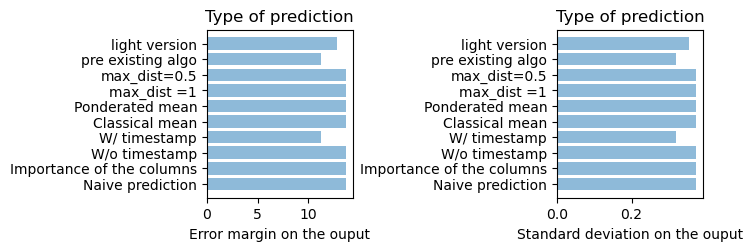

In [55]:
"""Display to compare the errors"""
objects = ('Naive prediction', 'Importance of the columns', 'W/o timestamp', 'W/ timestamp', 'Classical mean', 'Ponderated mean','max_dist =1','max_dist=0.5', 'pre existing algo','light version')
plt.subplot(231)
plt.barh(objects, error[:,0], align='center', alpha=0.5)
plt.yticks(objects)
plt.xlabel('Error margin on the ouput')
plt.title('Type of prediction')
plt.subplot(233)
plt.barh(objects, deviation[:,0], align='center', alpha=0.5)
plt.yticks(objects)
plt.xlabel('Standard deviation on the ouput')
plt.title('Type of prediction')
plt.show()

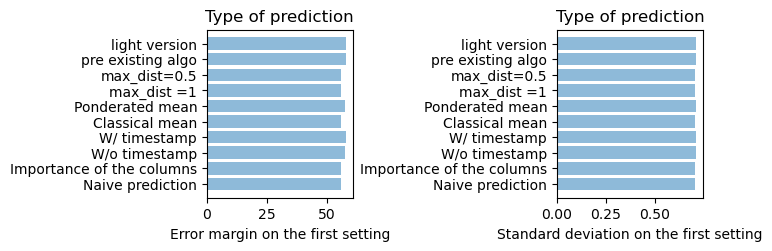

In [56]:
plt.subplot(231)
plt.barh(objects, error[:,1], align='center', alpha=0.5)
plt.yticks(objects)
plt.xlabel('Error margin on the first setting')
plt.title('Type of prediction')
plt.subplot(233)
plt.barh(objects, deviation[:,1], align='center', alpha=0.5)
plt.yticks(objects)
plt.xlabel('Standard deviation on the first setting')
plt.title('Type of prediction')
plt.show()

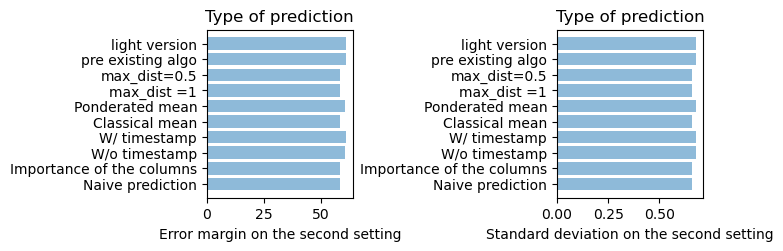

In [57]:
plt.subplot(231)
plt.barh(objects, error[:,2], align='center', alpha=0.5)
plt.yticks(objects)
plt.xlabel('Error margin on the second setting')
plt.title('Type of prediction')
plt.subplot(233)
plt.barh(objects, deviation[:,2], align='center', alpha=0.5)
plt.yticks(objects)
plt.xlabel('Standard deviation on the second setting')
plt.title('Type of prediction')
plt.show()

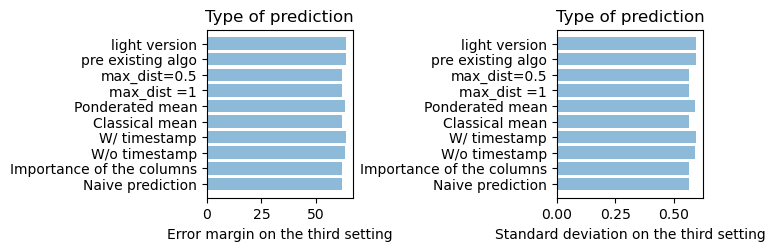

In [58]:
plt.subplot(231)
plt.barh(objects, error[:,3], align='center', alpha=0.5)
plt.yticks(objects)
plt.xlabel('Error margin on the third setting')
plt.title('Type of prediction')
plt.subplot(233)
plt.barh(objects, deviation[:,3], align='center', alpha=0.5)
plt.yticks(objects)
plt.xlabel('Standard deviation on the third setting')
plt.title('Type of prediction')
plt.show()

Text(0.5, 1.0, 'Error margins')

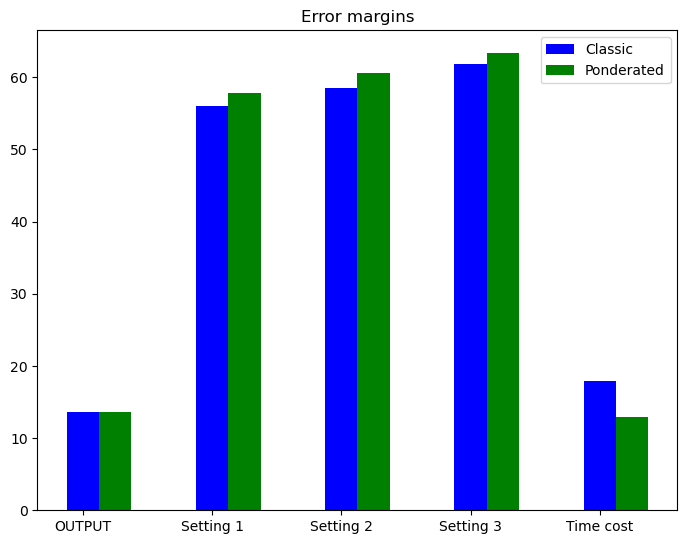

In [59]:
"""Comparaison mean methods"""
errorM = [np.append(error[4,:],predict_cost[4]),np.append(error[5,:],predict_cost[5])]
objectsM = ('OUTPUT','Setting 1','Setting 2','Setting 3','Time cost')
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(objectsM, errorM[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, errorM[1], color = 'g', width = 0.25)
ax.legend(labels=['Classic', 'Ponderated'])
plt.title('Error margins')

Text(0.5, 1.0, 'Error margins')

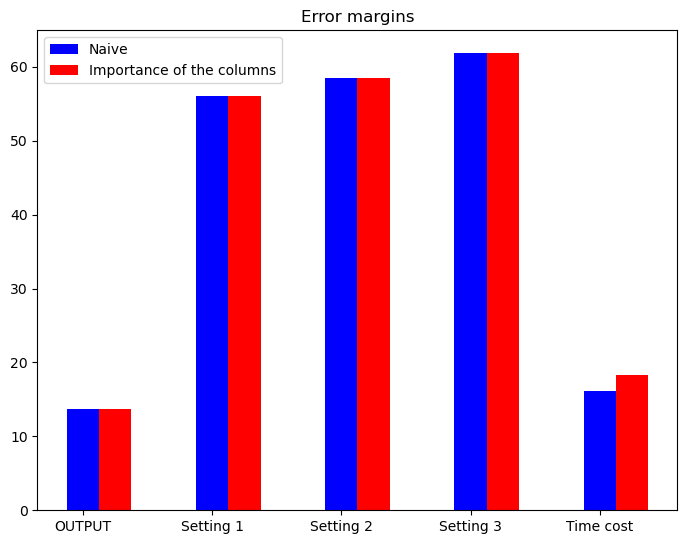

In [60]:
"""Comparaison predict methods"""
errorM = [np.append(error[0,:],predict_cost[0]),np.append(error[1,:],predict_cost[1])]
objectsM = ('OUTPUT','Setting 1','Setting 2','Setting 3','Time cost')
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(objectsM, errorM[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, errorM[1], color = 'r', width = 0.25)
ax.legend(labels=['Naive', 'Importance of the columns'])
plt.title('Error margins')

Text(0.5, 1.0, 'Error margins')

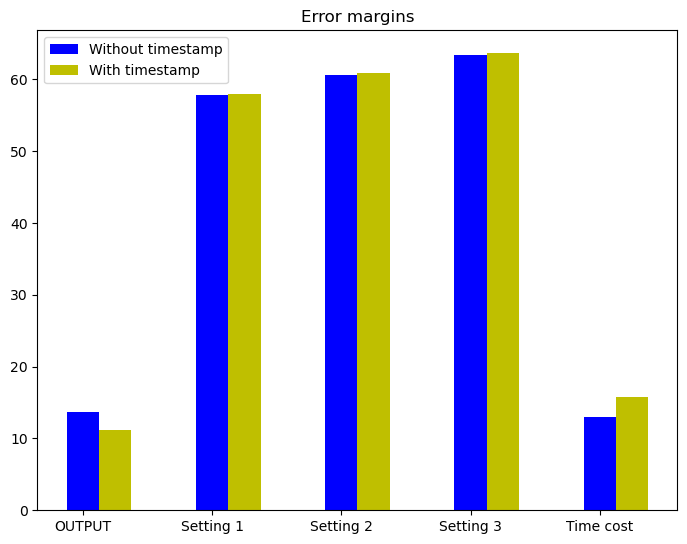

In [61]:
"""Comparaison timestamp or not"""
errorM = [np.append(error[2,:],predict_cost[2]),np.append(error[3,:],predict_cost[3])]
objectsM = ('OUTPUT','Setting 1','Setting 2','Setting 3','Time cost')
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(objectsM, errorM[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, errorM[1], color = 'y', width = 0.25)
ax.legend(labels=['Without timestamp', 'With timestamp'])
plt.title('Error margins')

Text(0.5, 1.0, 'Error margins')

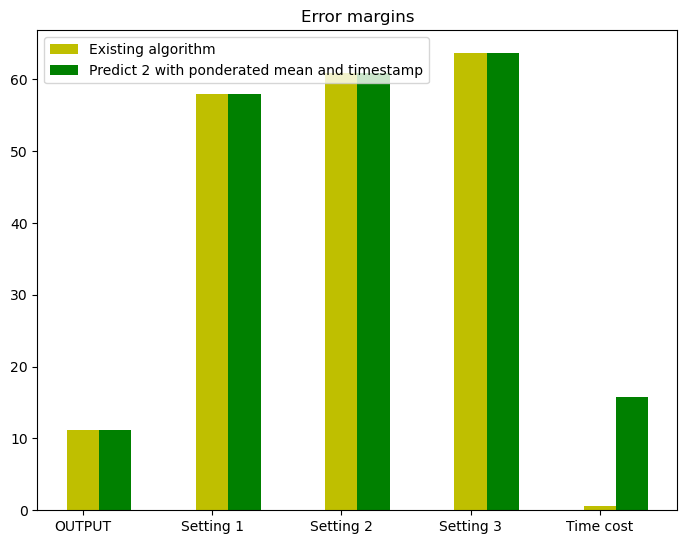

In [62]:
"""Comparaison with pre-existing algorithm"""
errorM = [np.append(error[8,:],predict_cost[8]),np.append(error[3,:],predict_cost[3])]
objectsM = ('OUTPUT','Setting 1','Setting 2','Setting 3','Time cost')
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(objectsM, errorM[0], color = 'y', width = 0.25)
ax.bar(X + 0.25, errorM[1], color = 'g', width = 0.25)
ax.legend(labels=['Existing algorithm', 'Predict 2 with ponderated mean and timestamp'])
plt.title('Error margins')

Text(0.5, 1.0, 'Error margins')

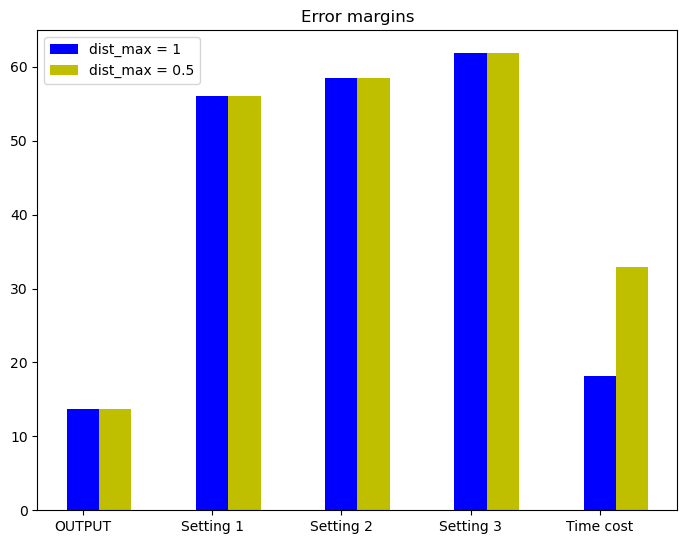

In [63]:
"""Comparaison dist_max"""
errorM = [np.append(error[6,:],predict_cost[6]),np.append(error[7,:],predict_cost[7])]
objectsM = ('OUTPUT','Setting 1','Setting 2','Setting 3','Time cost')
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(objectsM, errorM[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, errorM[1], color = 'y', width = 0.25)
ax.legend(labels=['dist_max = 1', 'dist_max = 0.5'])
plt.title('Error margins')

Text(0.5, 1.0, 'Error margins')

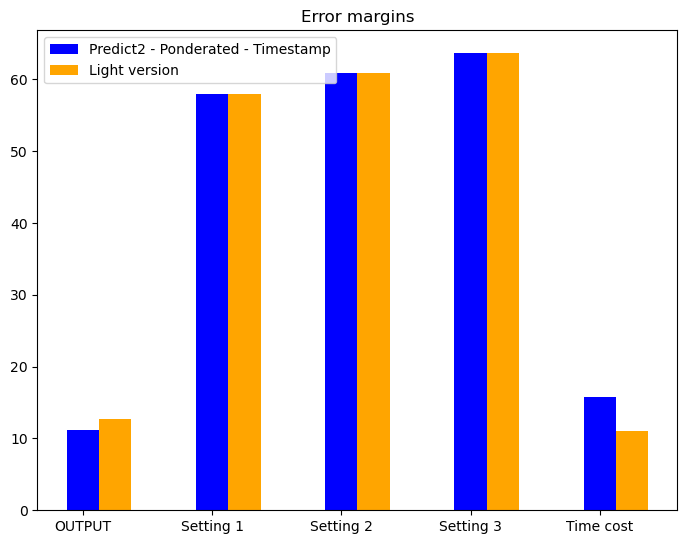

In [67]:
"""Comparaison light version and predict 2 with tumestamp and the ponderated method"""
errorM = [np.append(error[3,:],predict_cost[3]),np.append(error[9,:],predict_cost[9])]
objectsM = ('OUTPUT','Setting 1','Setting 2','Setting 3','Time cost')
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(objectsM, errorM[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, errorM[1], color = 'orange', width = 0.25)
ax.legend(labels=['Predict2 - Ponderated - Timestamp', 'Light version'])
plt.title('Error margins')

In [ ]:
"""Display the error margin and the time to predict according to the number of neighbors"""
x = [k for k in range(30)]
ytime = np.zeros(30)
error = np.zeros((30,4))
deviation = np.zeros((30,4))

for k in range(1,31):
    nb_neighbors = k
    voisins_err = NearestNeighbors(n_neighbors=nb_neighbors).fit(xtrain)
    
    debut = time()
    error[k-1,:], deviation[k-5,:] = evaluation_y(predict(xtest, ytrain, standardized_X_settings, voisins_err),ytest,X_settings_test)
    ytime[k-1] = time() - debut

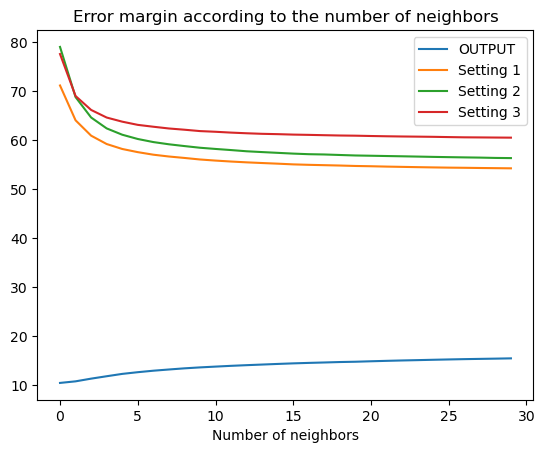

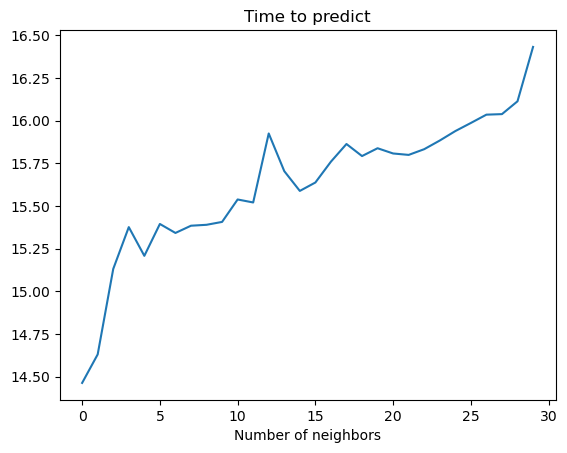

In [32]:
plt.plot(x,error[:,0],label='OUTPUT')
plt.plot(x,error[:,1],label='Setting 1')
plt.plot(x,error[:,2],label='Setting 2')
plt.plot(x,error[:,3],label='Setting 3')
plt.xlabel('Number of neighbors')
plt.title('Error margin according to the number of neighbors')
plt.legend()
plt.show()
plt.plot(x,ytime)
plt.xlabel('Number of neighbors')
plt.title('Time to predict')
plt.show()

Text(0.5, 1.0, 'Cost of each prediction')

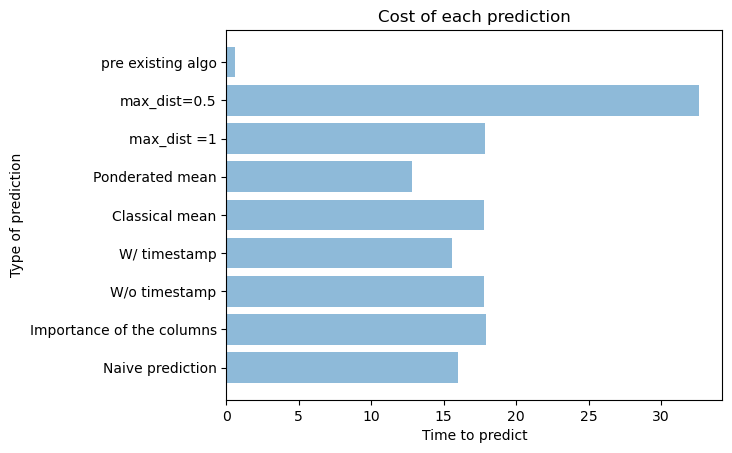

In [33]:
"""Display of the cost of each prediction"""
plt.barh(objects, predict_cost, align='center', alpha=0.5)
plt.yticks(objects)
plt.xlabel('Time to predict')
plt.ylabel('Type of prediction')
plt.title('Cost of each prediction')